In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def textcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    y = str(x.split('  ')[2])
    z = y.replace("'", "")
    return z

In [3]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def numcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    x.split('  ')
    if ' NaN' in x:
        y = str(x.split('  ')[1])
        z = y.replace("'", "")
        a = z.replace(" ", "")
        return a
    else:
        w = str(str1).split('\n')[0]
        x = str(w)
        y = str(x.split('  ')[2])
        z = y.replace("'", "")
        return z

In [4]:
#repository like the one we have online
general_data = pd.read_csv('/Users/kmanj/FITS_BD_Files/Repository_Data/Repository.csv', encoding ='latin1')
general_data;

In [5]:
dir = '/Users/kmanj/Manjavacas Research/Eriksson_2019/Eriksson2019/'
dir_save = '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/'

In [6]:
dwarfs_files = os.listdir(dir)
dwarf_dat = [archive for archive in dwarfs_files if archive.endswith(".dat")]
dwarf_dat

['J0013_2018-09-29_Flux-time.dat',
 'J0135_2018-09-29_Flux-time.dat',
 'J0136_2018-07-31_Flux-time.dat',
 'J0138_2017-10-12_Flux-time.dat',
 'J0138_2018-09-26_Flux-time.dat',
 'J0150_2018-09-27_Flux-time.dat',
 'J0316_2018-09-27_Flux-time.dat',
 'J2132_2017-10-11_Flux-time.dat',
 'J2132_2018-09-27_Flux-time.dat',
 'J2148_2017-10-12_Flux-time.dat',
 'J2148_2018-09-26_Flux-time.dat',
 'J2215_2017-10-13_Flux-time.dat',
 'J2215_2018-09-25_Flux-time.dat',
 'J2239_2018-09-27_Flux-time.dat',
 'J2303_2018-09-28_Flux-time.dat']

In [7]:
new_name_file = []
new_name = []

# Iterate over the elements of the first list.
for archivo in dwarf_dat:
    # Extract the first 5 characters of the file name
    first_5_characteres = archivo[:5]
    
    # Iterate over the elements of the second list.
    for valor in general_data['Name_file']:
        # Extract the first 5 characters of the reference value
        valor = str(valor)
        first_5_values = valor[:5]
        
        # Compare the first 5 characters of the two elements
        if first_5_characteres == first_5_values:
            # Modify the file name to the desired format
            nuevo_nombre = valor + ".fit"
            # Add the new name to the new list
            new_name.append(valor)
            new_name_file.append(nuevo_nombre)
            # Break the inner loop once a match is found.
            break

new_name_file;
new_name

['J0013-11',
 'J0135+02',
 'J0136+09',
 'J0138-03',
 'J0138-03',
 'J0150+38',
 'J0316+26',
 'J2132-14',
 'J2132-14',
 'J2148+40',
 'J2148+40',
 'J2215+21',
 'J2215+21',
 'J2239+16',
 'J2303+31']

In [8]:
#lecture of the data
dwarfs_data = []
for i in range(len(new_name_file)):
    data = pd.read_csv("{}{}".format(dir,dwarf_dat[i]), comment='#', header=None, sep=' ')
    dwarfs_data.append(data.transpose())

In [9]:
dwarfs_data;

In [10]:
Reference = 'Eriksson et. al 2019, A&A, 629, 145'
Telescope = 'Nordic Optical Telescope (NOT)'
Instrument = 'NOTCam'
filter1 = 'J filter (1.165 - 1.328 microns)'

In [11]:
Object = []
SpectralType = []
Jmag = []
dJmag = []
Hmag = []
dHmag = []
Kmag = []
dKmag = []
Date_obs = []



for i in range(len(new_name_file)): 
    Object.append(textcleaner(general_data['Name'][general_data['Name_file'] == new_name[i]]))
    SpectralType.append(textcleaner(general_data['SpT '][general_data['Name_file'] == new_name[i]]))
    Jmag.append(textcleaner(general_data['J'][general_data['Name_file'] == new_name[i]]))
    dJmag.append(textcleaner(general_data['dJ'][general_data['Name_file'] == new_name[i]]))
    Hmag.append(numcleaner(general_data['H'][general_data['Name_file'] == new_name[i]]))
    dHmag.append(numcleaner(general_data['dH'][general_data['Name_file'] == new_name[i]]))
    Kmag.append(numcleaner(general_data['K'][general_data['Name_file'] == new_name[i]]))
    dKmag.append(numcleaner(general_data['dK'][general_data['Name_file'] == new_name[i]]))

for i in dwarf_dat:
    Date_obs.append(i[6:16])


In [12]:
RA = [
    3.343,
    23.8555,
    24.235937,
    24.652458,
    24.652458,
    27.54525,
    49.115,
    323.2041,
    323.2041,
    327.068041,
    327.068041,
    333.9045,
    333.9045,
    339.906465,
    345.872
]
Dec = [
    -11.7168,
    2.0898,
    9.563146,
    -3.372556,
    -3.372556,
    38.45675,
    26.8411,
    -14.8818,
    -14.8818,
    40.0665,
    40.0665,
    21.1821,
    21.1821,
    16.287833,
    31.8392  
]

In [13]:
name_files = []
for i in range(len(dwarfs_data)):
    lc = l.LightCurve(time = list(dwarfs_data[i][0]) * u.h, flux = list(dwarfs_data[i][1]) * u.dimensionless_unscaled)
    name = dir_save + Object[i]
    contador = 1
    while name + '_Erik2019.fits' in name_files:
        name = name + '_' + str(contador)
        contador += 1
    else:
        lc.to_fits(path = name + '_Erik2019.fits')
        name_files.append(name + '_Erik2019.fits')

In [14]:
name_files

['/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J00132229-1143006_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J01352531+0205232_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/SIMP J013656.5+093347.3_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J01383648-0322181_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J01383648-0322181_1_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J01500997+3827259_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J03162759+2650277_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J21324898-1452544_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASS J21324898-1452544_1_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASSW J2148162+400359_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files/Data/Eriksson_2019/2MASSW J2148162+400359_1_Erik2019.fits',
 '/Users/kmanj/FITS_BD_Files

In [15]:
for i in range(len(dwarf_dat)):
    with fits.open(name_files[i], mode = 'update') as f:
        f[0].header['OBJECT'] = Object[i]
        f[0].header['SPECTYPE'] = SpectralType[i]
        f[0].header['TSTART'] = 58037.00000000
        f[0].header['TSTOP'] = 58389.00000000
        f[0].header['TIMESYS'] = 'mjd'
        f[0].header['TELESCOP'] = Telescope
        f[0].header['INSTRUME'] = Instrument
        f[0].header['FILTER'] = filter1
        f[0].header['VOREF'] = Reference
        f[0].header['RA_OBJ'] = RA[i]
        f[0].header['DEC_OBJ'] = Dec[i]
        f[0].header['JMAG'] = Jmag[i] + '+/-' + dJmag[i]
        f[0].header['HMAG'] = Hmag[i] + '+/-' + dHmag[i]
        f[0].header['KMAG'] = Kmag[i] + '+/-' + dKmag[i]

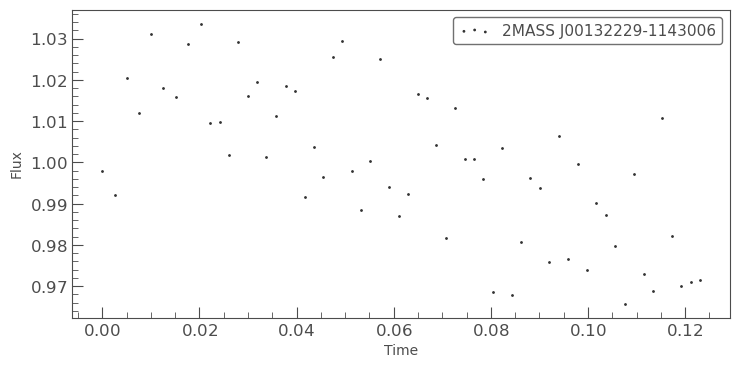

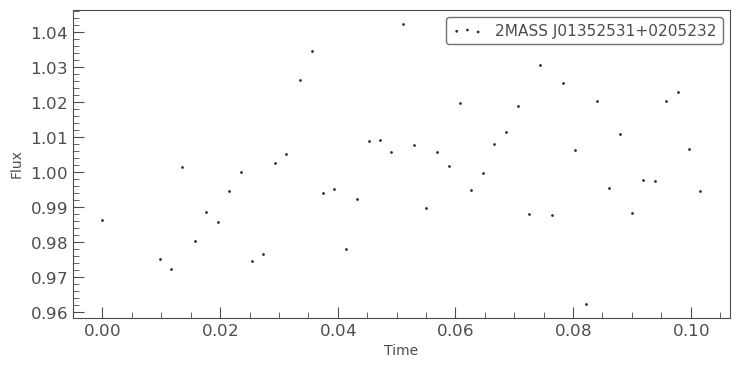

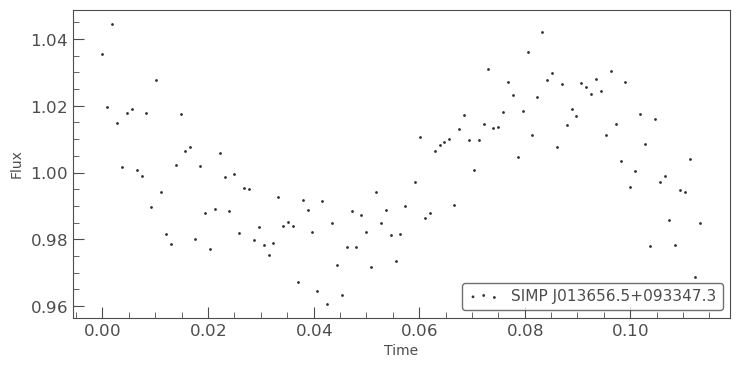

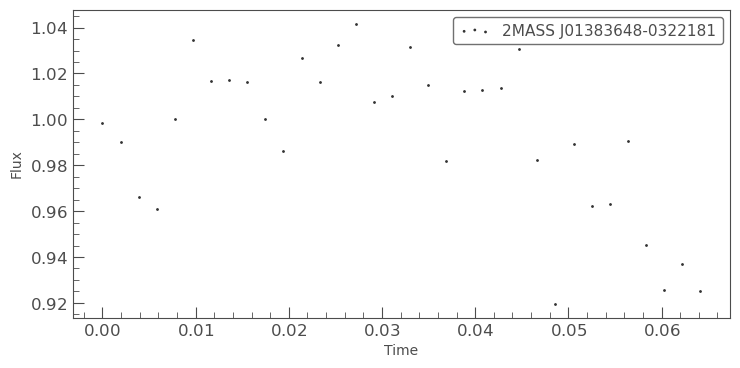

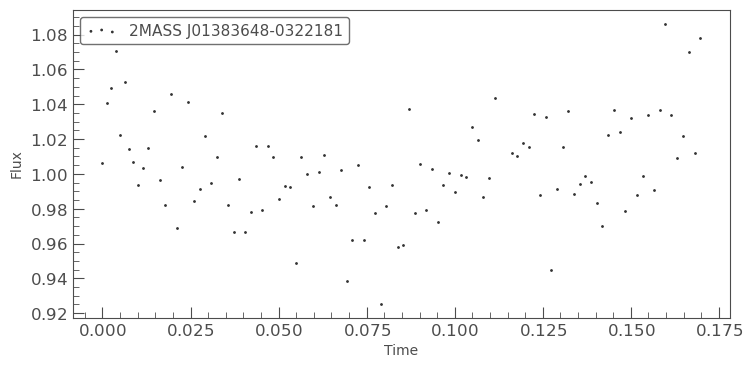

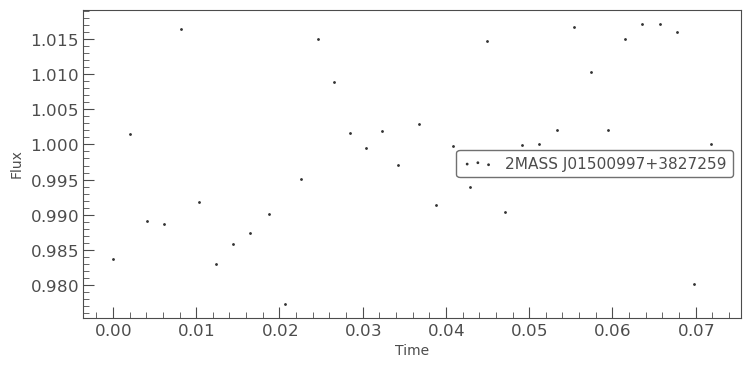

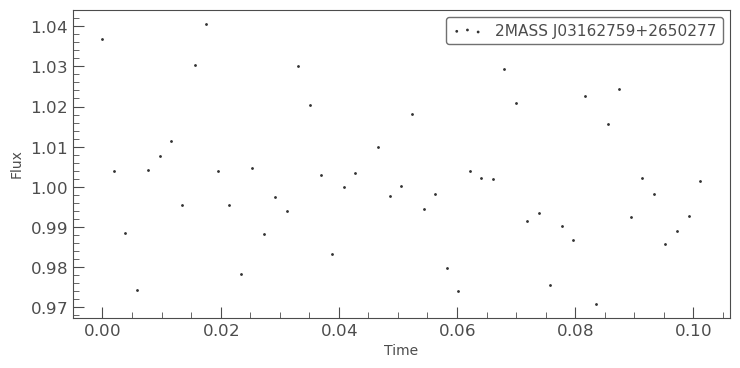

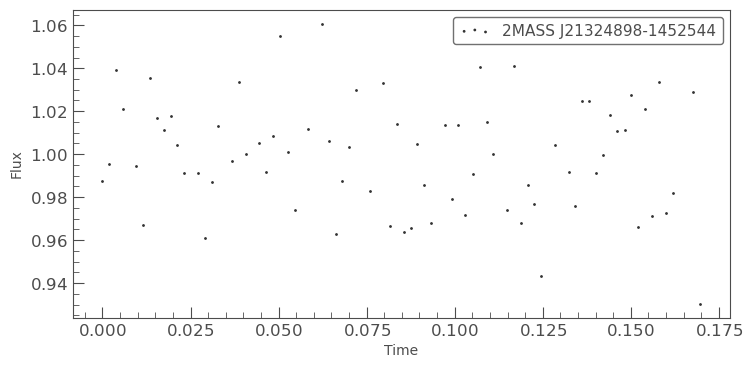

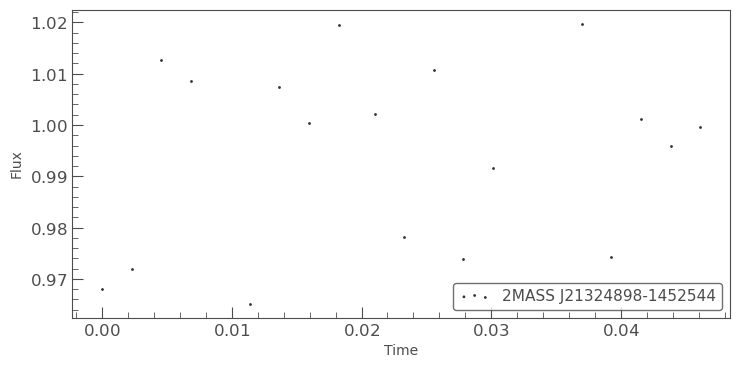

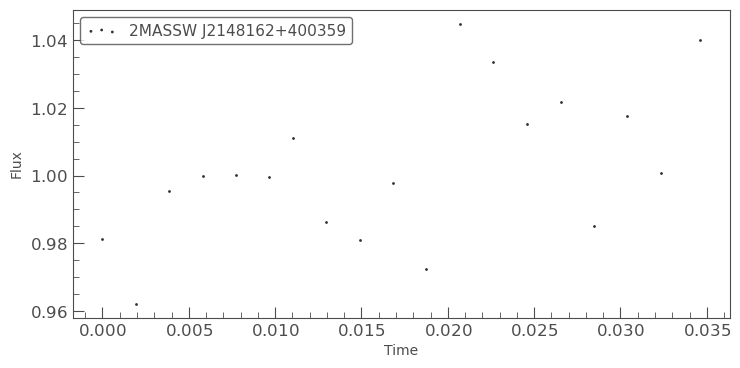

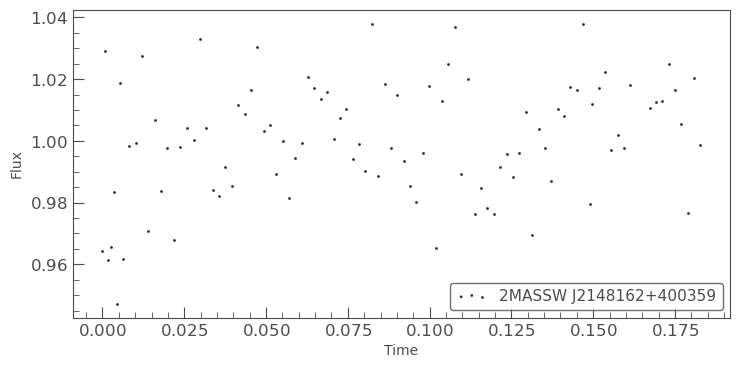

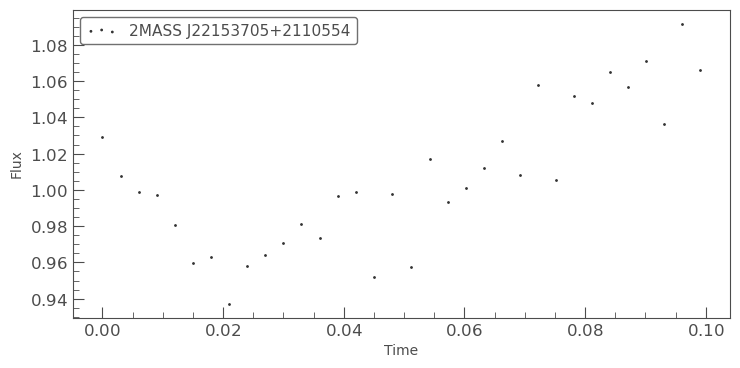

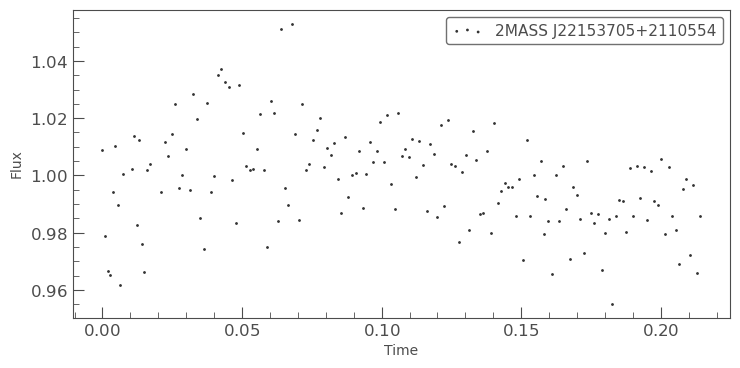

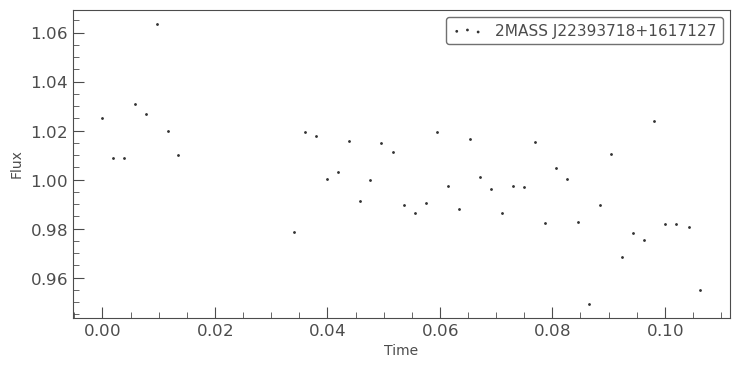

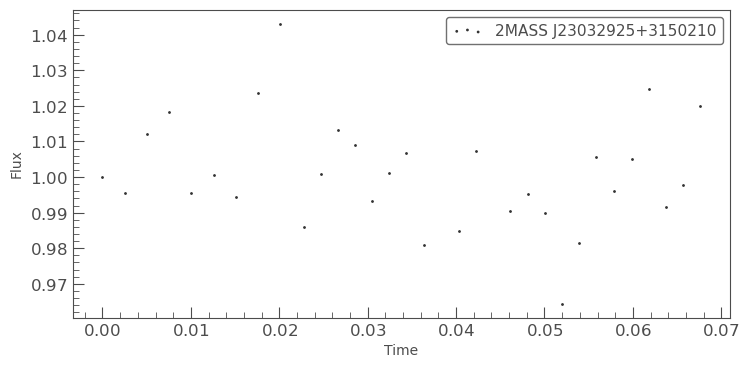

In [16]:
for i in name_files:
    lc = read_generic_lightcurve(i, time_format = 'mjd')
    lc.scatter()